# Sentiment Analysis Model Training

This notebook demonstrates the training process for both Vietnamese and English sentiment analysis models.

In [1]:
%pip install utils

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'sentiment_analysis'))
sys.path.append(project_root)

from src.config import Config
from src.data.data_loader import DataLoader
from src.data.preprocessor import DataPreprocessor
from src.features.feature_engineering import FeatureExtractor
from src.models.model_trainer import EnhancedModelTrainer
from src.utils.evaluation import ModelEvaluator

You should consider upgrading via the 'c:\Users\tamaisme\Desktop\Projects\PYTHON\PROJECT\sentiment_analysis\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## 1. Load and Prepare Data

In [2]:
def load_and_prepare_data(language: str):
    config = Config()
    data_loader = DataLoader(config)
    preprocessor = DataPreprocessor(language, config)
    
    # Load data
    print(f"Loading {language} data...")
    df = data_loader.load_data(language)
    print(f"Raw data shape: {df.shape}")
    
    # Preprocess
    processed_df = preprocessor.preprocess(df)
    print(f"Processed data shape: {processed_df.shape}")
    
    # Display class distribution
    plt.figure(figsize=(8, 5))
    processed_df['label'].value_counts().plot(kind='bar')
    plt.title(f'Class Distribution - {language.upper()}')
    plt.show()
    
    return processed_df, config

### Vietnamese Data

Loading vi data...
2024-11-17 04:24:02,180 - src.data.data_loader - INFO - Valid samples after validation: 19873
Raw data shape: (19873, 2)
2024-11-17 04:24:02,182 - src.data.preprocessor - INFO - Preprocessing vi data...
2024-11-17 04:24:12,646 - src.data.preprocessor - INFO - Preprocessed 15345 valid samples
Processed data shape: (15345, 3)


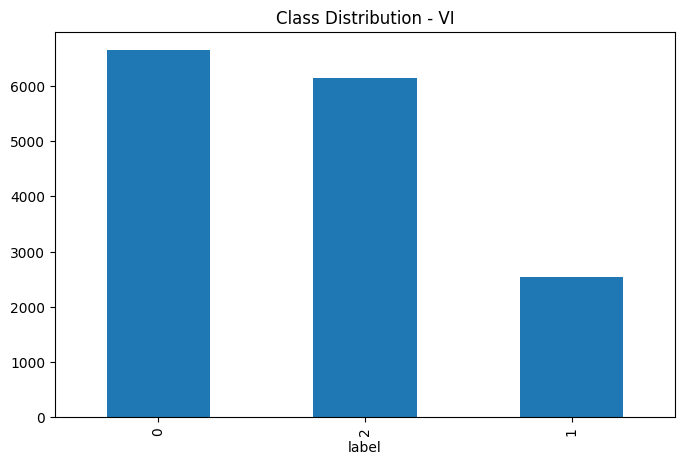

In [3]:
vi_df, config = load_and_prepare_data('vi')

### English Data

Loading en data...
2024-11-17 04:24:12,854 - src.data.data_loader - INFO - Valid samples after validation: 21769
2024-11-17 04:24:12,854 - src.data.data_loader - INFO - Valid samples after validation: 21769
Raw data shape: (21769, 2)
2024-11-17 04:24:12,858 - src.data.preprocessor - INFO - Preprocessing en data...
2024-11-17 04:24:12,858 - src.data.preprocessor - INFO - Preprocessing en data...
2024-11-17 04:24:18,039 - src.data.preprocessor - INFO - Preprocessed 19967 valid samples
2024-11-17 04:24:18,039 - src.data.preprocessor - INFO - Preprocessed 19967 valid samples
Processed data shape: (19967, 3)


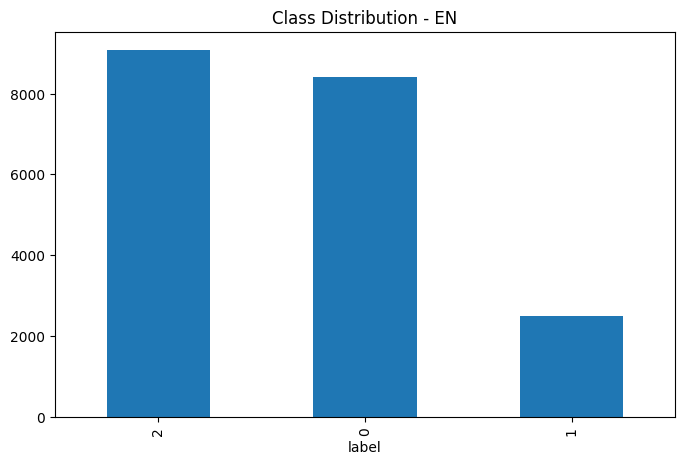

English dataset loaded successfully with shape: (19967, 3)


In [4]:
# Load and prepare English data
try:
	en_df, _ = load_and_prepare_data('en')

	# Check if the DataFrame is empty
	if en_df.empty:
		print("Error: The English dataset is empty. Please check the data loading process.")
	else:
		print(f"English dataset loaded successfully with shape: {en_df.shape}")
except Exception as e:
	print(f"An error occurred while loading the English dataset: {e}")

## 2. Feature Engineering

In [5]:
def extract_features(df: pd.DataFrame, language: str, config: Config):
    feature_extractor = FeatureExtractor(language, config)
    data_loader = DataLoader(config)
    
    # Split data
    train_df, test_df = data_loader.split_data(df)
    
    # Get features and labels
    X_train, y_train = data_loader.get_features_and_labels(train_df)
    X_test, y_test = data_loader.get_features_and_labels(test_df)
    
    # Extract features
    print(f"Extracting features for {language}...")
    X_train_features = feature_extractor.extract_features(X_train)
    X_test_features = feature_extractor.extract_features(X_test)
    
    return X_train_features, X_test_features, y_train, y_test

In [6]:
try:
	# Ensure 'feature_extraction' key exists
	if 'feature_extraction' not in config.LANGUAGE_CONFIGS['vi']:
		config.LANGUAGE_CONFIGS['vi']['feature_extraction'] = {}
	if 'feature_extraction' not in config.LANGUAGE_CONFIGS['en']:
		config.LANGUAGE_CONFIGS['en']['feature_extraction'] = {}

	# Adjust feature extraction parameters
	config.LANGUAGE_CONFIGS['vi']['feature_extraction']['min_df'] = 0.0001
	config.LANGUAGE_CONFIGS['vi']['feature_extraction']['max_df'] = 0.95
	config.LANGUAGE_CONFIGS['en']['feature_extraction']['min_df'] = 0.0001
	config.LANGUAGE_CONFIGS['en']['feature_extraction']['max_df'] = 0.95

	# Ensure Vietnamese data is loaded
	try:
		if 'vi_df' not in globals():
			vi_df, config = load_and_prepare_data('vi')
		X_train_vi, X_test_vi, y_train_vi, y_test_vi = extract_features(vi_df, 'vi', config)
	except Exception as e:
		print(f"An error occurred while loading and preparing Vietnamese data: {e}")
		X_train_vi, X_test_vi, y_train_vi, y_test_vi = None, None, None, None

	# Ensure English data is loaded
	try:
		if 'en_df' not in globals():
			en_df, _ = load_and_prepare_data('en')
		if en_df.empty:
			print("Error: The English dataset is empty. Please check the data loading process.")
			X_train_en, X_test_en, y_train_en, y_test_en = None, None, None, None
		else:
			X_train_en, X_test_en, y_train_en, y_test_en = extract_features(en_df, 'en', config)
	except Exception as e:
		print(f"An error occurred while loading and preparing English data: {e}")
		X_train_en, X_test_en, y_train_en, y_test_en = None, None, None, None

except Exception as e:
	print(f"An error occurred: {e}")
	X_train_vi, X_test_vi, y_train_vi, y_test_vi = None, None, None, None
	X_train_en, X_test_en, y_train_en, y_test_en = None, None, None, None

2024-11-17 04:24:18,154 - src.data.data_loader - INFO - Class distribution before split: {0: 0.43362658846529817, 2: 0.40110785272075594, 1: 0.16526555881394592}
2024-11-17 04:24:18,154 - src.data.data_loader - INFO - Class distribution before split: {0: 0.43362658846529817, 2: 0.40110785272075594, 1: 0.16526555881394592}
2024-11-17 04:24:18,154 - src.data.data_loader - INFO - Class distribution before split: {0: 0.43362658846529817, 2: 0.40110785272075594, 1: 0.16526555881394592}
2024-11-17 04:24:18,165 - src.data.data_loader - INFO - Training set size: 10741 samples
2024-11-17 04:24:18,165 - src.data.data_loader - INFO - Training set size: 10741 samples
2024-11-17 04:24:18,165 - src.data.data_loader - INFO - Training set size: 10741 samples
2024-11-17 04:24:18,168 - src.data.data_loader - INFO - Test set size: 4604 samples
2024-11-17 04:24:18,168 - src.data.data_loader - INFO - Test set size: 4604 samples
2024-11-17 04:24:18,168 - src.data.data_loader - INFO - Test set size: 4604 sam

## 3. Model Training and Evaluation

In [7]:
def train_and_evaluate(X_train, X_test, y_train, y_test, language: str, config: Config):
    # Train model
    trainer = EnhancedModelTrainer(language, config)
    model = trainer.train_with_grid_search(X_train, y_train)
    
    # Evaluate
    evaluator = ModelEvaluator(language)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    results = evaluator.evaluate(y_test, y_pred, y_prob)
    print(f"\nResults for {language.upper()}:")
    print(results['classification_report'])
    
    return model

### Train Vietnamese Model

In [8]:
# Check if the training data is valid
if X_train_vi is None or X_test_vi is None or y_train_vi is None or y_test_vi is None:
	print("Error: Training data for Vietnamese model is not valid.")
else:
	try:
		# Ensure feature extraction is done correctly
		if X_train_vi.size == 0 or X_test_vi.size == 0:
			print("Error: Feature extraction for Vietnamese model failed.")
		else:
			vi_model = train_and_evaluate(X_train_vi, X_test_vi, y_train_vi, y_test_vi, 'vi', config)
			if vi_model is None:
				print("Error: Model training for Vietnamese model failed.")
			else:
				print("Vietnamese model trained successfully.")
	except AttributeError as e:
		print(f"Error during model training: {e}")
	except Exception as e:
		print(f"An unexpected error occurred during model training: {e}")

2024-11-17 04:24:30,682 - src.models.model_trainer - INFO - Starting model training...
2024-11-17 04:24:33,067 - src.models.model_trainer - INFO - Extracted features shape: (10741, 547)
2024-11-17 04:24:33,076 - src.models.model_trainer - INFO - 
Training rf model...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
2024-11-17 04:24:38,628 - src.models.model_trainer - ERROR - Error training rf: Pipeline.fit does not accept the sample_weight parameter. You can pass parameters to specific steps of your pipeline using the stepname__parameter format, e.g. `Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight)`.
2024-11-17 04:24:38,629 - src.models.model_trainer - INFO - 
Training svm model...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
2024-11-17 04:24:42,396 - src.models.model_trainer - ERROR - Error training svm: Pipeline.fit does not accept the sample_weight parameter. You can pass parameters to specific steps of your pipeline using the stepname_

### Train English Model

In [9]:
# Check if the training data is valid
if X_train_en is None or X_test_en is None or y_train_en is None or y_test_en is None:
	print("Error: Training data for English model is not valid.")
else:
	try:
		en_model = train_and_evaluate(X_train_en, X_test_en, y_train_en, y_test_en, 'en', config)
		if en_model is None:
			print("Error: Model training for English model failed.")
	except AttributeError as e:
		print(f"Error during model training: {e}")

2024-11-17 04:24:46,697 - src.models.model_trainer - INFO - Starting model training...
2024-11-17 04:24:46,697 - src.models.model_trainer - INFO - Starting model training...
2024-11-17 04:24:49,630 - src.models.model_trainer - INFO - Extracted features shape: (13976, 533)
2024-11-17 04:24:49,630 - src.models.model_trainer - INFO - Extracted features shape: (13976, 533)
2024-11-17 04:24:49,634 - src.models.model_trainer - INFO - 
Training rf model...
2024-11-17 04:24:49,634 - src.models.model_trainer - INFO - 
Training rf model...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
2024-11-17 04:24:50,433 - src.models.model_trainer - ERROR - Error training rf: Pipeline.fit does not accept the sample_weight parameter. You can pass parameters to specific steps of your pipeline using the stepname__parameter format, e.g. `Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight)`.
2024-11-17 04:24:50,433 - src.models.model_trainer - ERROR - Error training rf: Pipeline.fit

## 4. Save Models

In [10]:
import joblib

# Save Vietnamese model
if 'vi_model' in globals():
	vi_model_path = config.LANGUAGE_CONFIGS['vi']['model_path']
	os.makedirs(os.path.dirname(vi_model_path), exist_ok=True)
	joblib.dump(vi_model, vi_model_path)
	print(f"Vietnamese model saved to {vi_model_path}")
else:
	print("Error: Vietnamese model is not defined.")

# Save English model
if 'en_model' in globals():
	en_model_path = config.LANGUAGE_CONFIGS['en']['model_path']
	os.makedirs(os.path.dirname(en_model_path), exist_ok=True)
	joblib.dump(en_model, en_model_path)
	print(f"English model saved to {en_model_path}")
else:
	print("Error: English model is not defined.")

Error: Vietnamese model is not defined.
Error: English model is not defined.
